In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar el archivo CSV
csv_path = "Mexico_NoNulos.csv"  # Asegurar que esté en el mismo directorio de ejecución
df = pd.read_csv(csv_path)


# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()


,review_scores_accuracy,review_scores_location,host_total_listings_count,instant_bookable,number_of_reviews,latitude,property_type,longitude,room_type,availability_60,...,review_scores_checkin,availability_365,host_verifications,last_review,number_of_reviews_ltm,host_location,price,review_scores_value,amenities,calculated_host_listings_count
0,4.793877,4.845981,1,f,0,19.38382,Entire villa,-99.27334,Entire home/apt,58,...,4.843371,363,"['email', 'phone', 'work_email']",2024-09-22,0,"Mexico City, Mexico","$3,865.00",4.725268,"[""Free parking on premises"", ""Washer"", ""Wifi"",...",1
1,4.560000,4.980000,13,f,64,19.41162,Entire home,-99.17794,Entire home/apt,24,...,4.870000,325,"['email', 'phone', 'work_email']",2023-03-26,0,"Mexico City, Mexico","$1,200.00",4.480000,"[""Iron"", ""Washer"", ""Wifi"", ""Host greets you"", ...",8
2,4.810000,4.980000,4,f,49,19.41152,Entire rental unit,-99.16857,Entire home/apt,20,...,4.940000,325,"['email', 'phone']",2024-05-05,4,"Mexico City, Mexico","$2,029.00",4.910000,"[""Iron"", ""Wifi"", ""Bathtub"", ""Refrigerator"", ""D...",2
3,4.900000,4.960000,4,f,127,19.35614,Entire rental unit,-99.16308,Entire home/apt,27,...,4.960000,257,"['email', 'phone', 'work_email']",2024-09-22,7,"Mexico City, Mexico","$1,140.00",4.920000,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...",3
4,5.000000,4.910000,7,f,11,19.43211,Entire loft,-99.19327,Entire home/apt,9,...,5.000000,275,"['email', 'phone']",2023-08-16,0,"Mexico City, Mexico","$3,633.00",4.820000,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...",3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   review_scores_accuracy                        26582 non-null  float64
 1   review_scores_location                        26582 non-null  float64
 2   host_total_listings_count                     26582 non-null  int64  
 3   instant_bookable                              26582 non-null  object 
 4   number_of_reviews                             26582 non-null  int64  
 5   latitude                                      26582 non-null  float64
 6   property_type                                 26582 non-null  object 
 7   longitude                                     26582 non-null  float64
 8   room_type                                     26582 non-null  object 
 9   availability_60                               26582 non-null 

In [9]:
valores_nulos=df.isnull().sum()
valores_nulos

,0
review_scores_accuracy,0
review_scores_location,0
host_total_listings_count,0
instant_bookable,0
number_of_reviews,0
latitude,0
property_type,0
longitude,0
room_type,0
availability_60,0


In [22]:
# *Creo 2 dataframes para procesar outliers*

# Seleccionar solo las columnas numéricas del dataset de México
columnas_cuantitativas_mexico = [
    'review_scores_accuracy', 'review_scores_location',
    'host_total_listings_count', 'number_of_reviews', 'latitude', 'longitude',
    'availability_60', 'availability_30', 'bedrooms',
    'calculated_host_listings_count_entire_homes', 'accommodates',
    'calculated_host_listings_count_private_rooms', 'minimum_nights',
    'number_of_reviews_l30d', 'availability_90', 'beds', 'review_scores_rating',
    'maximum_nights', 'review_scores_cleanliness', 'review_scores_communication',
    'host_listings_count', 'review_scores_checkin', 'availability_365',
    'number_of_reviews_ltm', 'review_scores_value',
    'calculated_host_listings_count'
]

# Seleccionar solo las columnas numéricas correctamente
cuantitativas = df[columnas_cuantitativas_mexico]  # Filtrar solo columnas numéricas
cualitativas = df.iloc[:, [0]]  # Manteniendo la primera columna como cualitativa


In [23]:
cuantitativas

,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,calculated_host_listings_count_entire_homes,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.845981,1,0,19.383820,-99.273340,58,28,1.0,1,...,4.757117,7,4.761882,4.829863,1,4.843371,363,0,4.725268,1
1,4.560000,4.980000,13,64,19.411620,-99.177940,24,1,5.0,4,...,4.580000,365,4.700000,4.780000,12,4.870000,325,0,4.480000,8
2,4.810000,4.980000,4,49,19.411520,-99.168570,20,3,2.0,2,...,4.900000,30,4.750000,4.920000,3,4.940000,325,4,4.910000,2
3,4.900000,4.960000,4,127,19.356140,-99.163080,27,7,1.0,2,...,4.910000,180,4.960000,4.980000,3,4.960000,257,7,4.920000,3
4,5.000000,4.910000,7,11,19.432110,-99.193270,9,9,1.0,3,...,4.910000,365,5.000000,4.730000,5,5.000000,275,0,4.820000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.845981,279,0,19.387329,-99.246731,60,30,2.0,14,...,4.757117,45,4.761882,4.829863,167,4.843371,365,0,4.725268,37
26578,4.793877,4.845981,16,0,19.432687,-99.197736,0,0,1.0,8,...,4.757117,365,4.761882,4.829863,16,4.843371,177,0,4.725268,16
26579,4.793877,4.845981,16,0,19.432687,-99.197736,0,0,1.0,8,...,4.757117,365,4.761882,4.829863,16,4.843371,177,0,4.725268,16
26580,4.793877,4.845981,16,0,19.432687,-99.197736,0,0,1.0,8,...,4.757117,365,4.761882,4.829863,16,4.843371,177,0,4.725268,16


In [24]:
cualitativas

,review_scores_accuracy
0,4.793877
1,4.560000
2,4.810000
3,4.900000
4,5.000000
...,...
26577,4.793877
26578,4.793877
26579,4.793877
26580,4.793877


<Figure size 1500x800 with 0 Axes>

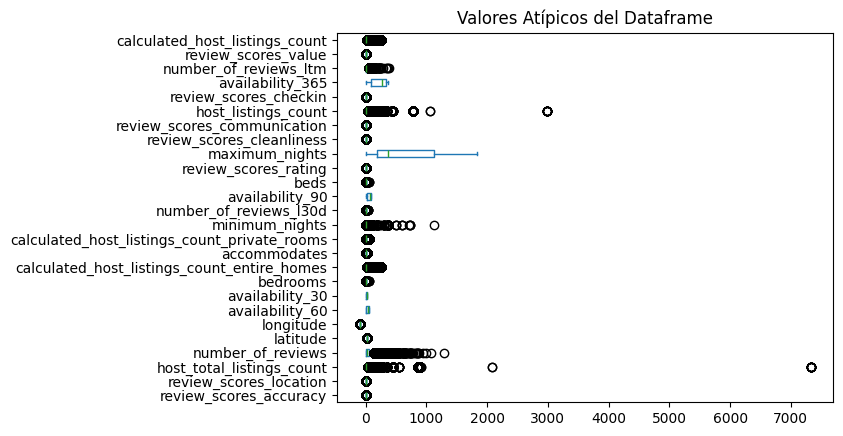

In [25]:
#Realizamos cada diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False) #cuantitativas["nombre_columna"].plot()
plt.title("Valores Atípicos del Dataframe")
plt.show()

# ***Procedimiento desviacion estandar para eliminar outliers***

In [26]:
#Encuentro los valores extremos
y=cuantitativas
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido review_scores_accuracy                             5.770310
review_scores_location                             5.655222
host_total_listings_count                        614.887404
number_of_reviews                                271.153557
latitude                                          19.532892
longitude                                        -99.066742
availability_60                                   97.331591
availability_30                                   48.523868
bedrooms                                           5.345804
calculated_host_listings_count_entire_homes      132.732505
accommodates                                      10.430103
calculated_host_listings_count_private_rooms      24.106967
minimum_nights                                    81.830056
number_of_reviews_l30d                             6.823979
availability_90                                  149.606839
beds                                               6.981545
review_scores_

In [27]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,calculated_host_listings_count_entire_homes,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.845981,1.0,0.0,19.383820,NaN,58,28,1.0,1.0,...,4.757117,7.0,4.761882,4.829863,1.0,4.843371,363,0.0,4.725268,1.0
1,4.560000,4.980000,13.0,64.0,19.411620,-99.177940,24,1,5.0,4.0,...,4.580000,365.0,4.700000,4.780000,12.0,4.870000,325,0.0,4.480000,8.0
2,4.810000,4.980000,4.0,49.0,19.411520,-99.168570,20,3,2.0,2.0,...,4.900000,30.0,4.750000,4.920000,3.0,4.940000,325,4.0,4.910000,2.0
3,4.900000,4.960000,4.0,127.0,19.356140,-99.163080,27,7,1.0,2.0,...,4.910000,180.0,4.960000,4.980000,3.0,4.960000,257,7.0,4.920000,3.0
4,5.000000,4.910000,7.0,11.0,19.432110,-99.193270,9,9,1.0,3.0,...,4.910000,365.0,5.000000,4.730000,5.0,5.000000,275,0.0,4.820000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.845981,279.0,0.0,19.387329,-99.246731,60,30,2.0,14.0,...,4.757117,45.0,4.761882,4.829863,167.0,4.843371,365,0.0,4.725268,37.0
26578,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26579,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26580,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0


In [28]:
#corroboramos valores nulos del datafrem
valores_nulos=data3.isnull().sum()
valores_nulos

,0
review_scores_accuracy,402
review_scores_location,520
host_total_listings_count,380
number_of_reviews,608
latitude,357
longitude,712
availability_60,0
availability_30,0
bedrooms,286
calculated_host_listings_count_entire_homes,969


In [29]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,calculated_host_listings_count_entire_homes,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.845981,1.0,0.0,19.383820,-99.200000,58,28,1.0,1.0,...,4.757117,7.0,4.761882,4.829863,1.0,4.843371,363,0.0,4.725268,1.0
1,4.560000,4.980000,13.0,64.0,19.411620,-99.177940,24,1,5.0,4.0,...,4.580000,365.0,4.700000,4.780000,12.0,4.870000,325,0.0,4.480000,8.0
2,4.810000,4.980000,4.0,49.0,19.411520,-99.168570,20,3,2.0,2.0,...,4.900000,30.0,4.750000,4.920000,3.0,4.940000,325,4.0,4.910000,2.0
3,4.900000,4.960000,4.0,127.0,19.356140,-99.163080,27,7,1.0,2.0,...,4.910000,180.0,4.960000,4.980000,3.0,4.960000,257,7.0,4.920000,3.0
4,5.000000,4.910000,7.0,11.0,19.432110,-99.193270,9,9,1.0,3.0,...,4.910000,365.0,5.000000,4.730000,5.0,5.000000,275,0.0,4.820000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.845981,279.0,0.0,19.387329,-99.246731,60,30,2.0,14.0,...,4.757117,45.0,4.761882,4.829863,167.0,4.843371,365,0.0,4.725268,37.0
26578,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26579,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26580,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365.0,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0


In [30]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

,0
review_scores_accuracy,0
review_scores_location,0
host_total_listings_count,0
number_of_reviews,0
latitude,0
longitude,0
availability_60,0
availability_30,0
bedrooms,0
calculated_host_listings_count_entire_homes,0


# ***Procedimiento cuartiles para sustituir valores atipicos***

In [31]:
#metodo aplicando Cuartiles. Encuentro cuartiles 0.25 7 0.75
y=cuantitativas
percentile25=y.quantile(0.25)#q1
percentile75=y.quantile(0.75)#q3
iqr=percentile75-percentile25

Limite_Inferior_iqr=percentile25-(1.5*iqr)
Limite_Superior_iqr=percentile75+(1.5*iqr)
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido review_scores_accuracy                             5.230000
review_scores_location                             5.255000
host_total_listings_count                         39.500000
number_of_reviews                                135.500000
latitude                                          19.494089
longitude                                        -99.117734
availability_60                                  113.000000
availability_30                                   63.500000
bedrooms                                           3.500000
calculated_host_listings_count_entire_homes       15.000000
accommodates                                       7.000000
calculated_host_listings_count_private_rooms       5.000000
minimum_nights                                     3.500000
number_of_reviews_l30d                             5.000000
availability_90                                  162.500000
beds                                               3.500000
review_scores_

In [32]:
#Obtenemos datos limpios del Dataframe
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,calculated_host_listings_count_entire_homes,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.845981,1.0,0.0,19.383820,NaN,58,28,1.0,1.0,...,4.757117,7,4.761882,4.829863,1.0,4.843371,363,0.0,4.725268,1.0
1,4.560000,4.980000,13.0,64.0,19.411620,-99.177940,24,1,NaN,4.0,...,4.580000,365,4.700000,4.780000,12.0,4.870000,325,0.0,4.480000,8.0
2,4.810000,4.980000,4.0,49.0,19.411520,-99.168570,20,3,2.0,2.0,...,4.900000,30,4.750000,4.920000,3.0,4.940000,325,4.0,4.910000,2.0
3,4.900000,4.960000,4.0,127.0,19.356140,-99.163080,27,7,1.0,2.0,...,4.910000,180,4.960000,4.980000,3.0,4.960000,257,7.0,4.920000,3.0
4,5.000000,4.910000,7.0,11.0,19.432110,-99.193270,9,9,1.0,3.0,...,4.910000,365,5.000000,4.730000,5.0,5.000000,275,0.0,4.820000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.845981,NaN,0.0,19.387329,NaN,60,30,2.0,14.0,...,4.757117,45,4.761882,4.829863,NaN,4.843371,365,0.0,4.725268,NaN
26578,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26579,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26580,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0


In [33]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
review_scores_accuracy,2198
review_scores_location,1879
host_total_listings_count,3764
number_of_reviews,2328
latitude,1779
longitude,2845
availability_60,0
availability_30,0
bedrooms,858
calculated_host_listings_count_entire_homes,3708


In [34]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,calculated_host_listings_count_entire_homes,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.845981,1.0,0.0,19.383820,-99.200000,58,28,1.0,1.0,...,4.757117,7,4.761882,4.829863,1.0,4.843371,363,0.0,4.725268,1.0
1,4.560000,4.980000,13.0,64.0,19.411620,-99.177940,24,1,1.4,4.0,...,4.580000,365,4.700000,4.780000,12.0,4.870000,325,0.0,4.480000,8.0
2,4.810000,4.980000,4.0,49.0,19.411520,-99.168570,20,3,2.0,2.0,...,4.900000,30,4.750000,4.920000,3.0,4.940000,325,4.0,4.910000,2.0
3,4.900000,4.960000,4.0,127.0,19.356140,-99.163080,27,7,1.0,2.0,...,4.910000,180,4.960000,4.980000,3.0,4.960000,257,7.0,4.920000,3.0
4,5.000000,4.910000,7.0,11.0,19.432110,-99.193270,9,9,1.0,3.0,...,4.910000,365,5.000000,4.730000,5.0,5.000000,275,0.0,4.820000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.845981,7.3,0.0,19.387329,-99.200000,60,30,2.0,14.0,...,4.757117,45,4.761882,4.829863,6.2,4.843371,365,0.0,4.725268,4.9
26578,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26579,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26580,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,8.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0


In [35]:
#Unimos el datframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios=pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,review_scores_accuracy,review_scores_accuracy,review_scores_location,host_total_listings_count,number_of_reviews,latitude,longitude,availability_60,availability_30,bedrooms,...,review_scores_rating,maximum_nights,review_scores_cleanliness,review_scores_communication,host_listings_count,review_scores_checkin,availability_365,number_of_reviews_ltm,review_scores_value,calculated_host_listings_count
0,4.793877,4.793877,4.845981,1.0,0.0,19.383820,-99.200000,58,28,1.0,...,4.757117,7,4.761882,4.829863,1.0,4.843371,363,0.0,4.725268,1.0
1,4.560000,4.560000,4.980000,13.0,64.0,19.411620,-99.177940,24,1,1.4,...,4.580000,365,4.700000,4.780000,12.0,4.870000,325,0.0,4.480000,8.0
2,4.810000,4.810000,4.980000,4.0,49.0,19.411520,-99.168570,20,3,2.0,...,4.900000,30,4.750000,4.920000,3.0,4.940000,325,4.0,4.910000,2.0
3,4.900000,4.900000,4.960000,4.0,127.0,19.356140,-99.163080,27,7,1.0,...,4.910000,180,4.960000,4.980000,3.0,4.960000,257,7.0,4.920000,3.0
4,5.000000,5.000000,4.910000,7.0,11.0,19.432110,-99.193270,9,9,1.0,...,4.910000,365,5.000000,4.730000,5.0,5.000000,275,0.0,4.820000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.793877,4.793877,4.845981,7.3,0.0,19.387329,-99.200000,60,30,2.0,...,4.757117,45,4.761882,4.829863,6.2,4.843371,365,0.0,4.725268,4.9
26578,4.793877,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26579,4.793877,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0
26580,4.793877,4.793877,4.845981,16.0,0.0,19.432687,-99.197736,0,0,1.0,...,4.757117,365,4.761882,4.829863,16.0,4.843371,177,0.0,4.725268,16.0


In [36]:
#Corraboramos los datos nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

,0
review_scores_accuracy,0
review_scores_accuracy,0
review_scores_location,0
host_total_listings_count,0
number_of_reviews,0
latitude,0
longitude,0
availability_60,0
availability_30,0
bedrooms,0


In [38]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv("Mexico_SinAtipicos.csv")